# Overview of python functions from laplace.selfinteractions

Overview of python functions from `biosspheres.laplace.selfinteractions`.

In [1]:
import biosspheres.laplace.selfinteractions as selfinteractions

In [2]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt

## Preliminaries

### Geometry

$N$ disjoint spheres in $\mathbb{R}^3$:
- Position vectors of the sphere centers: $\mathbf{p_j} \in \mathbb{R}^3$, with $j \in \{1,...,N\}$.  
- Radii: $\tilde{r}_j\in \mathbb{R}^+$, with $j \in \{1,...,N\}$.
- Interior of sphere $j$: $\Omega_j:=\{ \mathbf{x} \in \mathbb{R}^3:||\mathbf{x}-\mathbf{p_j}||_2<\tilde{r}_j \}$.
- Boundary of sphere $j$: $\Gamma_j:=\partial \Omega_j$.
- Exterior medium, $\Omega_0$: defined as $\mathbb{R}^3$ without the spheres and their boundaries.  

### Free space fundamental solution for the Laplace equation

The free space fundamental solution of the Laplace equation, which satisfies the radiation condition is:
$$g\left(\mathbf{r},\mathbf{r'}\right):= \frac{1}{4\pi ||\mathbf{r}-\mathbf{r}'||_2}, \quad \text{with } \mathbf{r}\not = \mathbf{r'}, \quad \text{and } -\Delta g \left(\mathbf{r},\mathbf{r'}\right)=\delta \left(\mathbf{r}-\mathbf{r'}\right).$$

### Layer operators

Single and double layer operators defined for smooth densities:
$$DL_{0j} \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  \psi\left(\mathbf{r}'\right) \nabla g\left(\mathbf{r},\mathbf{r'}\right) \cdot \widehat{\mathbf{n}}_{0j} \ dS',$$
$$SL_{0j} \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}'\right) g\left(\mathbf{r},\mathbf{r'}\right) dS'},$$
$$DL_j \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}'\right) \nabla g\left(\mathbf{r},\mathbf{r'}\right) \cdot \widehat{\mathbf{n}}_{j} \ dS'},$$
$$SL_j \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}' \right) g\left(\mathbf{r},\mathbf{r'}\right) dS'}$$

with the gradient being taken with respect to $\mathbf{r}'$, $\widehat{\mathbf{n}}_j$ being the exterior normal vector of $\Omega_j$, and $\widehat{\mathbf{n}}_j=-\widehat{\mathbf{n}}_{0j}$.

These operators are linear and continuous in the following Sobolev spaces:
$$DL_{0j}: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc} \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right),$$
$$SL_{0j}: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc}  \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right)  , $$
$$DL_{j}: H^{\frac{1}{2}}(\Gamma_j)\rightarrow H^1_{loc} \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right),$$
$$SL_{j}: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc}\left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right).$$

### Boundary integral operators

For $u\in C^\infty(\overline\Omega)$, Dirichlet and Neumann traces operators are defined as 
$$\gamma_d u := u|_{\Gamma},\qquad \gamma_n u := \nabla  u|_{\Gamma} \cdot \widehat{n},$$
where $\widehat{n}$ is the exterior unit normal.

By density arguments, the definition of Dirichlet and Neumann traces operator can be extended to $u_j \in H^1_{loc}(\Omega_j)$, with $j \{0, ..., N \}$. We extend the notation as follows

$$\gamma_d^{0j} u_0 := u_0|_{\Gamma_j},$$
$$\gamma_d^{j} u_j := u_0|_{\Gamma_j},$$
$$\gamma_n^{0j} u_0 := \nabla u_0|_{\Gamma_j} \cdot \widehat{n}_{0j},$$
$$\gamma_n^{j} u_j := \nabla u_0|_{\Gamma_j}\cdot \widehat{n}_{j},$$
where $\widehat{n}_{j}$ is the exterior normal of $\Omega_j$, with $j\in \{ 1, ..., N\}$ and $\widehat{n}_{0j}=-\widehat{n}_{j}$.

Now, we recall the definition of the boundary integral operators:
$$\begin{align*}
	V_{i,j}^0 &:=  \frac{1}{2} \left( \gamma_d^{i} SL_{0j} + \gamma_d^{0i} SL_{0j} \right) ,
	& V_{j}&:= \frac{1}{2} \left(  \gamma_d^{0j} SL_{j} + \gamma_d^{j} SL_{j} \right) ,\\
	K_{i,j}^0&:= \frac{1}{2} \left(\gamma_d^{i} DL_{0j} + \gamma_d^{0i} DL_{0j} \right) ,
	&K_{j}&:= \frac{1}{2} \left(\gamma_d^{0j} DL_{j} + \gamma_d^{j} DL_{j} \right),\\
	K^{*0}_{i,j}&:= \frac{1}{2} \left( - \gamma_n ^{i} SL_{0j} + \gamma_n ^{0i} SL_{0j}  \right),
	 & K^{*}_{j} &:= \frac{1}{2} \left( -\gamma_n ^{0j} SL_{j}  + \gamma_n ^{j} SL_{j} \right), \\
	W_{i,j}^0 &:= -\frac{1}{2} \left( - \gamma_n^{i} DL_{0j}  + \gamma_n^{0i} DL_{0j} \right) ,
	& W_{j} &:=- \frac{1}{2} \left( -\gamma_n^{0j} DL_{j} + \gamma_n^{j} DL_{j} \right).
\end{align*}$$

These operators are linear and continuous in the following Sobolev spaces: 
$$\begin{align*}
	V_{{i},j}^0 &: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_i),
	&V_{j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_j),\\
	W_{{i},j}^0&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_i),
	&W_{j}&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_j) ,\\
	K_{{i},j}^0&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_i),
	&K_{j}&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_j) ,\\
	K^{*0}_{{i},j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_i),
	&K^*_{j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_j).
\end{align*}$$

Since the domains are smooth, the jump relations for the potentials across a closed boundary yield
$$\begin{align*}
	V_{{i},j}^0 &=   \gamma_d^{0{i}} SL_{0j},
	& V_{j}&=  \gamma_d^{j} SL_{j},\\
	W_{{i},j}^0 &=-  \gamma_n^{0{i}} DL_{0j},
	& W_{j} &=- \gamma_n^{j} DL_{j}, \\
	  K_{{i},j}^0&= \gamma_d^{0{i}} DL_{0j}, i \not=j,
	 & K^{*0}_{{i},j} &= \gamma_n ^{0{i}} SL_{0j}, i  \not=j,
\end{align*}$$
and
$$\begin{align*}
	K_{j,j}^0(\psi) &= \frac{1}{2}\psi +\gamma_d^{0j} {DL_{0j}(\psi)} ,
	&K_{j}(\psi) &= \frac{1}{2} \psi +\gamma_d^{j} {DL_{j}(\psi)} ,\\
	 K^{*0}_{j,j}(\psi) &= -\frac{1}{2} \psi + \gamma_n^{0j} {SL_{0j}(\psi)},
	&K^*_{j}(\psi) &= -\frac{1}{2} \psi + \gamma_n^j {SL_{j}(\psi)}.
\end{align*}$$

### Calderón operators

$$A_{i,j}^0 = \begin{bmatrix} - K^0_{i,j} & V^0_{i,j} \\
W^0_{i,j} & K^{*0}_{i,j}\end{bmatrix}, \quad A_{j,j}= \begin{bmatrix} - K_{j,j} & V_{j,j} \\
W_{j,j} & K^{*0}_{j,j}\end{bmatrix}. $$

### Spherical coordinate system

A vector is written as $\mathbf{r}=\left(r,\varphi,\theta\right)^t$, with $r \in [0,\infty)$, $\varphi \in [0,2\pi)$ and $\theta \in [0,\pi]$, which in Cartesian coordinates is equivalent to $\mathbf{r}=r\left(\sin \theta \cos \varphi,\sin \theta \sin \varphi,\cos \theta\right)^t$. The unitary vectors of the spherical coordinate system can be written in Cartesian coordinates as
$$\begin{align*}
    &\widehat{\mathbf{e}}_r= (\sin \theta \cos \varphi , \sin \theta \sin \varphi , \cos \theta )^t, \\
    &\widehat{\mathbf{e}}_\theta=(\cos \theta \cos \varphi , \cos \theta \sin \varphi , -\sin \theta  )^t, \\
    &\widehat{\mathbf{e}}_{\varphi}=(-\sin \varphi , \cos \varphi , 0 )^t.
\end{align*}$$

Also, the gradient operator in spherical coordinates:
$$\begin{align*}
    \nabla f&=\frac{\partial f}{\partial r} \widehat{\mathbf{e}}_r+\frac{1}{r} \frac{\partial f}{\partial \theta} \widehat{\mathbf{e}}_\theta+\frac{1}{r \sin \theta} \frac{\partial f}{\partial \varphi} \widehat{\mathbf{e}}_{\varphi}
\end{align*}$$

### Legendre functions

 $P_l^m$ are the associated Legendre functions of degree $l$ and  order $m$ defined as:
$$P_{l}^m\left(x\right) := (-1)^m \left( 1- x^2\right)^{\frac{m}{2}} \frac{d^m}{dx^m}P_l(x), \quad P_{l}\left(x\right) := \frac{1}{2^ll!}\frac{d^l}{dx^l}(x^2-1)^l.$$

Here, the term $(-1)^m$ is the Condon-Shortley phase factor.

### Real spherical harmonics

Real spherical harmonics of degree $l$ and order $m$ are defined using spherical coordinates:
$$\begin{align}
		 Y_{l,m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0}) \frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \cos m \varphi ,\\
		Y_{l,-m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0})\frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \sin m \varphi ,
\end{align}$$
with $l\in \mathbb{N}_0$, $m\in \mathbb{Z}$ such that $0\leq m\leq l$. If $m=0$, then $\delta_{m,0}=1$, and it is zero otherwise.

### Orthonormality of spherical harmonics

Spherical harmonics are dense in $C(\mathbb{S}^2)$, with $\mathbb{S}^2$ the surface of the unit sphere, and form a complete orthonormal system in $L^2(\mathbb{S}^2)$ with respect to the internal product defined by:
$$\left( \psi , \xi \right)_{L^2(\mathbb{S}^2)} = \int_{0}^{2\pi}\int_{0}^{\pi} \psi\left(\theta,\varphi\right) \xi\left(\theta,\varphi\right)\sin\left(\theta\right) d\theta d\varphi.$$

They also are orthogonal in $H^1(\mathbb{S}^2)$.

### Reference systems

Let be $j\in \{1,...,N\}$. We define the reference system $j$ as the one centered at $\mathbf{p_j}$ with the same orientation that the reference system centered in the origin. Furthermore, we denote by $Y_{l,m,j}$ the spherical harmonic $Y_{l,m}$ centered in the origin of the reference system $j$. Thus, if $\left( r_j, \varphi_j, \theta_j \right) $ are the vector spherical coordinates of $\mathbf{r_j}$ in the reference system $j$, we have that $Y_{l,m,j}\left(\mathbf{r}_j\right)=Y_{l,m}\left(\theta_j, \varphi_j\right)$.

### Some spherical harmonics expansions

#### Real spherical harmonics and Laplace free space fundamental solution

Let $\mathbf{r}$, $\mathbf{r}'$ be vectors, whose spherical coordinates in the reference system $j$ are $\left(r_j,\theta_j, \varphi_j \right)$ and $\left(r_j',\theta_j', \varphi_j' \right)$, respectively. For $r_j>r_j'$ we have
$$g\left(\mathbf{r}, \mathbf{r}'\right) = \sum_{l=0}^{\infty}  \frac{1}{2l+1} \frac{r_j^{'l}}{r_j^{l+1}}\sum_{m=-l}^l Y_{l,m,j}\left(\mathbf{r}\right)  Y_{l,m,j}\left(\mathbf{r}'\right).$$
This series  and its term by term first derivatives with respect to $r_j$ or $r_j'$ are absolutely and uniformly convergent on compact subsets with $r_j>r_j'$.

Let be $j\in \{1,\ldots,N\}$, and $\tilde{r}_j$ the radius of $\Omega_j$.
- Let $\mathbf{r} \in \Omega_0$ and $\mathbf{r}=(r,\theta,\varphi )$ be expressed in the $j$th spherical coordinate system, then
$$\begin{align*}
    DL_{0j} ( Y_{l,m,j}) (\mathbf{r}) &= -\frac{l}{2l+1} \left( \frac{\tilde{r}_j}{r} \right)^{l+1} Y_{l,m}(\theta, \varphi ),\\
    SL_{0j} ( Y_{l,m,j}) (\mathbf{r}) &= \frac{\tilde{r}_j}{2l+1} \left( \frac{\tilde{r}_j}{r} \right)^{l+1} Y_{l,m}(\theta, \varphi ).
\end{align*}$$
- Let $\mathbf{r} \in \Omega_j$ and $\mathbf{r}=(r,\theta,\varphi )$ expressed in the $j$th spherical coordinate system, then
$$\begin{align*}
    DL_{j} ( Y_{l,m,j}) (\mathbf{r}) &= -\frac{l+1}{2l+1} \left( \frac{r}{\tilde{r}_j} \right)^{l} Y_{l,m}(\theta, \varphi ),\\
    SL_{j} ( Y_{l,m,j}) (\mathbf{r}) &= \frac{\tilde{r}_j}{2l+1} \left( \frac{r}{\tilde{r}_j} \right)^{l} Y_{l,m}(\theta, \varphi ).
\end{align*}$$

The diagonal forms of the BIOs are:
$$\begin{align*}
	V_{j,j}^0\left( Y_{l,m,j} \right) &= \frac{1}{2l+1} \tilde{r}_j Y_{l,m,j}, & V_{j}\left( Y_{l,m,j} \right)&=  \frac{1}{2l+1} \tilde{r}_j Y_{l,m,j},  \\
	K_{j,j}^0\left( Y_{l,m,j} \right) &= \frac{1}{2(2l+1)}Y_{l,m,j}, &	K_{j}\left( Y_{l,m,j} \right) &= -\frac{1}{2(2l+1)} Y_{l,m,j},\\
	K^{*0}_{j,j}\left( Y_{l,m,j} \right) &= \frac{1}{2l+1} Y_{l,m,j}, & K^*_{j}\left( Y_{l,m,j} \right) &= -\frac{1}{2(2l+1)} Y_{l,m,j},\\
	W_{j,j}^0\left( Y_{l,m,j} \right) &=  \frac{l(l+1)}{2l+1} \frac{1}{\tilde{r}_j} Y_{l,m,j}, & 	W_{j}\left( Y_{l,m,j} \right)&=  \frac{l(l+1)}{2l+1} \frac{1}{\tilde{r}_j}  Y_{l,m,j}.
\end{align*}$$

## `v_jj_azimuthal_symmetry`

This function returns a numpy array, which we will call `v`. Its length is `big_l + 1`. Each entry contains
$$v[l] = ( V_{j,j}^0 Y_{l,0} , Y_{l,0} )_{L^2(\mathbb{S_j})} = ( V_{j,j} Y_{l,0} , Y_{l,0} )_{L^2(\mathbb{S_j})} = \frac{\tilde{r}_j^3}{2 l + 1}$$
where $\mathbb{S_j}$ is the surface of the sphere $j$ and $r_j$ its radius.

### Docstring

In [3]:
print(selfinteractions.v_jj_azimuthal_symmetry.__doc__)


    Returns a numpy array with the boundary integral operator V_{j,j}
    with Laplace kernel evaluated and tested with spherical harmonics of
    order 0.

    Notes
    -----
    v[l] = ( V_{j,j} Y_l,0 ; Y_l,0 )_L^2(surface sphere radius r).
    = r**3 / (2 l + 1)
    for each l such that 0 <= l <= big_l, and with
    ( ., .)_L^2(surface sphere radius r): inner product where indicated.
    Y_l,0: spherical harmonic degree l, order 0.

    Parameters
    ----------
    big_l : int
        >= 0, max degree.
    r : float
        > 0, radius.

    Returns
    -------
    v : np.ndarray
        of floats, Length (big_l+1). See the section notes for the
        ordering of the array.

    


### Example

Definition of parameters:

In [4]:
big_l = 5
r = 1.3

Calling of the function:

In [5]:
v = selfinteractions.v_jj_azimuthal_symmetry(big_l, r)

Plot of the values:

Text(0.5, 0, 'l')

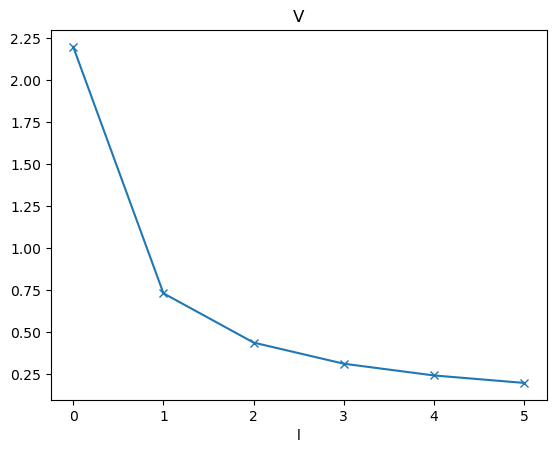

In [6]:
plt.figure()
plt.plot(
    v,
    marker='x'
)
plt.title('V')
plt.xlabel('l')

## `k_0_jj_azimuthal_symmetry`

This function returns a numpy array, which we will call `k_0`. Its length is `big_l + 1`. Each entry contains
$$\begin{align*}
k_0[l] &= ( K_{j,j}^0 Y_{l,0} , Y_{l,0} )_{L^2(\mathbb{S_j})} = ( K_{j,j}^{0*} Y_{l,0} , Y_{l,0} )_{L^2(\mathbb{S_j})}\\
&= \frac{\tilde{r}_j^2}{2(2 l + 1)}
\end{align*}$$
where $\mathbb{S_j}$ is the surface of the sphere $j$ and $r_j$ its radius.

### Docstring

In [7]:
print(selfinteractions.k_0_jj_azimuthal_symmetry.__doc__)


    Returns a numpy array with the boundary integral operator K_{j,j}^0,
    with normals from out to in of the sphere, with Laplace kernel
    evaluated and tested with spherical harmonics of order 0.

    Notes
    -----
    k_0_jj[l] =
        ( K_{j,j}^0 Y_l,0 ; Y_l,0 )_L^2(surface sphere radius r).
        = r**2 / (2*(2l + 1))
    for each l such that 0 <= l <= big_l, and with
    ( ., .)_L^2(surface sphere radius r): inner product where indicated.
    Y_l,0: spherical harmonic degree l, order 0.

    Notice that in this specific case
    ( K_{j,j}^0 Y_l,0 ; Y_l,0 )_L^2(surface sphere radius r)
    = ( K_{j,j}^{*0} Y_l,0 ; Y_l,0 )_L^2(surface sphere radius r)
    where K_{j,j}^{*0} has normals from out to in of the sphere, and
    with Laplace kernel.

    Parameters
    ----------
    big_l : int
        >= 0, max degree.
    r : float
        > 0, radius.

    Returns
    -------
    k_0_jj : np.ndarray
        of floats, length (big_l+1). See the section notes for the
       

### Example

Definition of parameters:

In [8]:
big_l = 5
r = 1.3

Calling of the function:

In [9]:
k_0 = selfinteractions.k_0_jj_azimuthal_symmetry(big_l, r)

Plotting the values:

Text(0.5, 0, 'l')

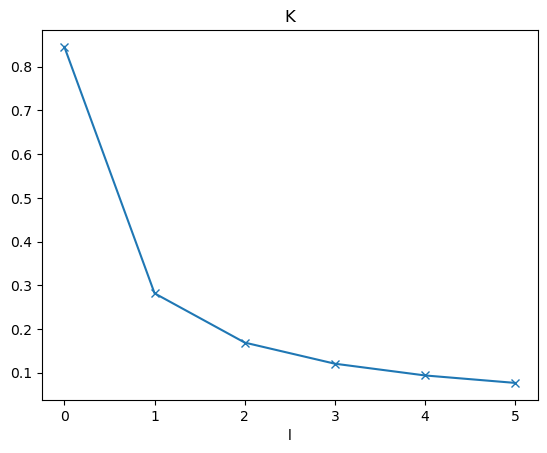

In [10]:
plt.figure()
plt.plot(
    k_0,
    marker='x'
)
plt.title('K')
plt.xlabel('l')

## `k_1_jj_azimuthal_symmetry`

This function returns a numpy array, which we will call `k_j`. Its length is `big_l + 1`. Each entry contains
$$\begin{align*}
k_j[l] &= ( K_{j,j} Y_{l,0} , Y_{l,0} )_{L^2(\mathbb{S_j})} = ( K_{j,j}^* Y_{l,0} , Y_{l,0} )_{L^2(\mathbb{S_j})}\\ &= -\frac{\tilde{r}_j^2}{2(2 l + 1)}
\end{align*}$$
where $\mathbb{S_j}$ is the surface of the sphere $j$ and $r_j$ its radius.

### Docstring

In [11]:
print(selfinteractions.k_1_jj_azimuthal_symmetry.__doc__)


    Returns a numpy array with the boundary integral operator K_{j,j},
    with normals from in to out of the sphere, with Laplace kernel
    evaluated and tested with spherical harmonics of order 0.

    Notes
    -----
    k_jj[l] = ( K_{j,j} Y_l,0 ; Y_l,0 )_L^2(surface sphere radius r).
    = -r**2 / (2*(2l + 1))
    for each l such that 0 <= l <= big_l, and with
    ( ., .)_L^2(surface sphere radius r): inner product where indicated.
    Y_l,0: spherical harmonic degree l, order 0.

    Notice that in this specific case
    ( K_{j,j} Y_l,0 ; Y_l,0 )_L^2(surface sphere radius r)
    = ( K_{j,j}^{*} Y_l,0 ; Y_l,0 )_L^2(surface sphere radius r)
    where K_{j,j}^{*} has normals from in to out of the sphere, and with
    Laplace kernel.

    Parameters
    ----------
    big_l : int
        >= 0, max degree.
    r : float
        > 0, radius.

    Returns
    -------
    k_jj : np.ndarray
        of floats, length (big_l+1). See the section notes for the
        ordering of the array.

### Example

Definition of parameters:

In [12]:
big_l = 5
r = 1.3

Calling of the function:

In [13]:
k_1 = selfinteractions.k_1_jj_azimuthal_symmetry(big_l, r)

Plotting the values:

Text(0.5, 0, 'l')

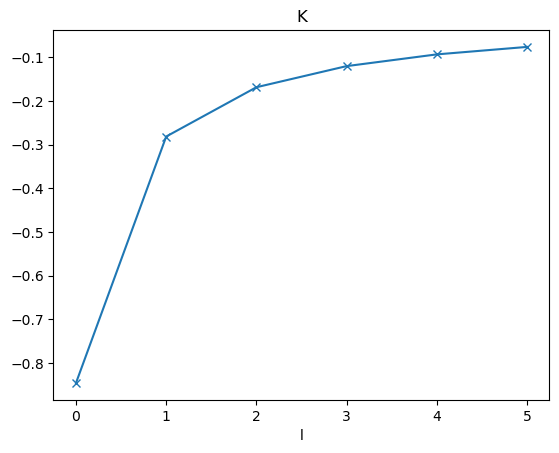

In [14]:
plt.figure()
plt.plot(
    k_1,
    marker='x'
)
plt.title('K')
plt.xlabel('l')

## `w_jj_azimuthal_symmetry`

This function returns a numpy array, which we will call `w`. Its length is `big_l + 1`. Each entry contains
$$w[l] = ( W_{j,j}^0 Y_{l,0} , Y_{l,0} )_{L^2(\mathbb{S_j})} = ( W_{j,j} Y_{l,0} , Y_{l,0} )_{L^2(\mathbb{S_j})} =\tilde{r}_j \frac{l(l+1)}{2l + 1}.$$

### Docstring

In [15]:
print(selfinteractions.w_jj_azimuthal_symmetry.__doc__)


    Returns a numpy array with the boundary integral operator W_{j,j}
    with Laplace kernel evaluated and tested with spherical harmonics of
    order 0.

    Notes
    -----
    w[l] = ( W_{j,j} Y_l,0 ; Y_l,0 )_L^2(surface sphere radius r).
    = r * l(l+1) / (2l + 1)
    for each l such that 0 <= l <= big_l, and with
    ( ., .)_L^2(surface sphere radius r): inner product where indicated.
    Y_l,0: spherical harmonic degree l, order 0.

    Parameters
    ----------
    big_l : int
        >= 0, max degree.
    r : float
        > 0, radius.

    Returns
    -------
    w : np.ndarray
        of floats, length (big_l+1). See the section notes for the
        ordering of the array.

    


### Example

Definition of parameters:

In [16]:
big_l = 5
r = 1.3

Calling of the function:

In [17]:
w = selfinteractions.w_jj_azimuthal_symmetry(big_l, r)

Plotting of the values:

Text(0.5, 0, 'l')

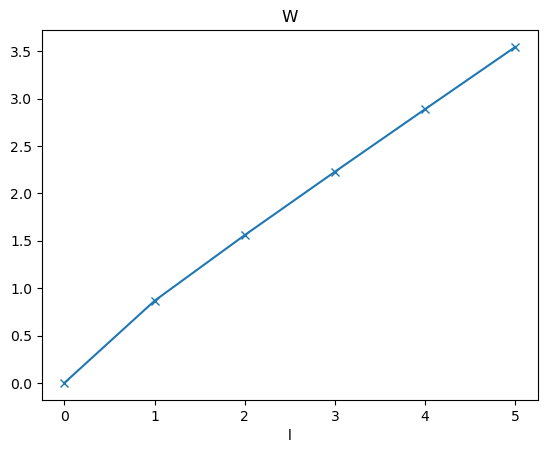

In [18]:
plt.figure()
plt.plot(
    w,
    marker='x'
)
plt.title('W')
plt.xlabel('l')

## `bio_jj`

### Docstring

In [19]:
print(selfinteractions.bio_jj.__doc__)


    Returns a numpy array with the corresponding boundary integral
    operator from the function bio_azimuthal with Laplace kernel
    evaluated and tested with spherical harmonics of all orders.

    Notes
    -----
    D[l*(2l+1) + m] =
        (D_{j,j} Y_l,m ; Y_l,m )_L^2(surface sphere radius r).
    which in this case is equal to
    = D[l*(2l+1)]
    for each l such that 0 <= l <= big_l, and with
    ( ., .)_L^2(surface sphere radius r): inner product where indicated.
    D: boundary integral operator corresponding to the function
        bio_azimuthal
    Y_l,m: spherical harmonic degree l, order m.

    Parameters
    ----------
    big_l : int
        >= 0, max degree.
    r : float
        > 0, radius.
    bio_azimuthal : Callable[[int, float], np.ndarray]
        python function for computing the operator for m = 0. Must be
        one of the functions written before this one.

    Returns
    -------
    op: np.ndarray
        of floats, length (big_l+1)**2. See the secti

### Example

Definition of the parameters:

In [20]:
big_l = 5
r = 1.3
operator = selfinteractions.w_jj_azimuthal_symmetry

In [21]:
full = selfinteractions.bio_jj(big_l, r, operator)

In [22]:
print(full)

[0.         0.86666667 0.86666667 0.86666667 1.56       1.56
 1.56       1.56       1.56       2.22857143 2.22857143 2.22857143
 2.22857143 2.22857143 2.22857143 2.22857143 2.88888889 2.88888889
 2.88888889 2.88888889 2.88888889 2.88888889 2.88888889 2.88888889
 2.88888889 3.54545455 3.54545455 3.54545455 3.54545455 3.54545455
 3.54545455 3.54545455 3.54545455 3.54545455 3.54545455 3.54545455]


## `a_0j_matrix`

### Docstring

In [23]:
print(selfinteractions.a_0j_matrix.__doc__)


    Returns a numpy array that represents the following matrix boundary
    integral operator
    A_{j,j}^0 = [ -K_{j,j}^0 , V_{j,j}^0  ]
                [  W_{j,j}^0 , K*_{j,j}^0 ]
    with Helmholtz kernel evaluated and tested with spherical harmonics
    of order 0 if azimuthal = True, or all orders if azimuthal = False.

    Each block is a diagonal matrix.

    Parameters
    ----------
    big_l : int
        >= 0, max degree.
    r : float
        > 0, radius.
    azimuthal : bool
        Default True.

    Returns
    -------
    matrix_0j : np.ndarray
        of floats.
        If azimuthal = True
            Shape (2*(big_l+1), 2*(big_l+1))
        Else
            Shape (2*(big_l+1)**2, 2*(big_l+1)**2)

    See Also
    --------
    a_0j_linear_operator
    v_jj_azimuthal_symmetry
    k_0_jj_azimuthal_symmetry
    w_jj_azimuthal_symmetry
    bio_jj

    


### Example

Definition of the parameters:

In [24]:
big_l = 3
r = 1.3

Calling of the function with `azimuthal = True`:

In [25]:
a_0j = selfinteractions.a_0j_matrix(big_l, r) # azimuthal = True

Plotting of the values:

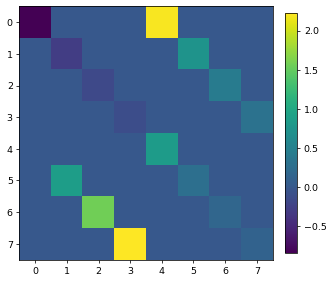

In [26]:
plt.figure(figsize=plt.figaspect(1), dpi=68., layout='constrained')
plt.imshow(a_0j)
plt.colorbar(shrink=0.75)
plt.show()

Calling of the function with `azimuthal = False`:

In [27]:
a_0j = selfinteractions.a_0j_matrix(big_l, r, azimuthal=False)

Plotting of the values:

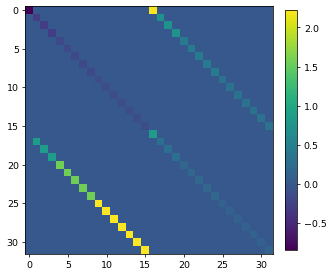

In [28]:
plt.figure(figsize=plt.figaspect(1), dpi=68., layout='constrained')
plt.imshow(a_0j)
plt.colorbar(shrink=0.75)
plt.show()

## `a_j_matrix`

### Docstring

In [29]:
print(selfinteractions.a_j_matrix.__doc__)


    Returns a numpy array that represents the following matrix boundary
    integral operator
    A_{j,j}^0 = [ -K_{j,j} , V_{j,j}  ]
                [  W_{j,j} , K*_{j,j} ]
    with Helmholtz kernel evaluated and tested with spherical harmonics
    of order 0 if azimuthal = True, or all orders if azimuthal = False.

    Each block is a diagonal matrix.

    Parameters
    ----------
    big_l : int
        >= 0, max degree.
    r : float
        > 0, radius.
    azimuthal : bool
        Default True.

    Returns
    -------
    matrix_j : np.ndarray
        of floats.
        If azimuthal = True
            Shape (2*(big_l+1), 2*(big_l+1))
        Else
            Shape (2*(big_l+1)**2, 2*(big_l+1)**2)

    See Also
    --------
    a_j_linear_operator
    v_jj_azimuthal_symmetry
    k_1_jj_azimuthal_symmetry
    w_jj_azimuthal_symmetry
    bio_jj

    


### Example

Definition of the parameters:

In [30]:
big_l = 3
r = 1.3

Calling of the function with `azimuthal = True`:

In [31]:
a_j = selfinteractions.a_j_matrix(big_l, r) # azimuthal = True

Plotting of the values:

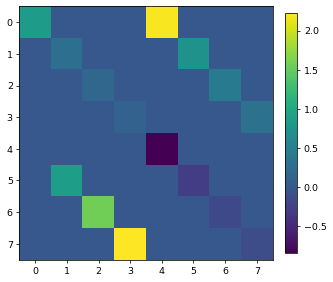

In [32]:
plt.figure(figsize=plt.figaspect(1), dpi=68., layout='constrained')
plt.imshow(a_j)
plt.colorbar(shrink=0.75)
plt.show()

Calling of the function with `azimuthal = False`:

In [33]:
a_j = selfinteractions.a_j_matrix(big_l, r, azimuthal=False)

Plotting of the values:

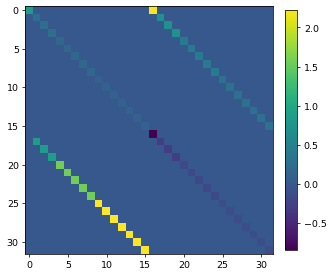

In [34]:
plt.figure(figsize=plt.figaspect(1), dpi=68., layout='constrained')
plt.imshow(a_j)
plt.colorbar(shrink=0.75)
plt.show()

## `a_0j_linear_operator`

### Docstring

In [35]:
print(selfinteractions.a_0j_linear_operator.__doc__)


    Returns a scipy linear operator equivalent to the given by
    a_0j_matrix.

    Parameters
    ----------
    azimuthal
    big_l : int
        >= 0, max degree.
    r : float
        > 0, radius.
    azimuthal : bool
        Default True.

    Returns
    -------
    linear_operator : sparse.linalg.LinearOperator
        a scipy linear operator.

    See Also
    --------
    a_0j_matrix

    


### Examples

#### Simpler example

Definition of parameters:

In [36]:
r = 2.5
big_l = 2

Calling of the function with `azimuthal = True`:

In [37]:
a_0j = selfinteractions.a_0j_linear_operator(big_l, r) # azimuthal = True

Calling of the function with `azimuthal = False`:

In [38]:
a_0j = selfinteractions.a_0j_matrix(big_l, r, azimuthal = False)

#### Comparing with the matrix version

Definition of parameters:

In [39]:
big_l = 5
r = 2.5

Initialization of a random vector as right hand side:

In [40]:
num = big_l + 1
b = np.random.random((2*num))

Calling of the functions to be compared

In [41]:
linear_operator = selfinteractions.a_0j_linear_operator(big_l, r) # azimuthal = True
matrix = selfinteractions.a_0j_matrix(big_l, r) # azimuthal = True

Solving the iterative system:

In [42]:
norms = []

def callback_function(pr_norm):
    norms.append(pr_norm)
    return 0.

solution, info = scipy.sparse.linalg.gmres(
    linear_operator, b,
    tol=10**(-9),
    restart=(2 * num)**3,
    callback=callback_function,
    callback_type='pr_norm')
print(info)

0


Solving the direct system:

In [43]:
solution2 = np.linalg.solve(matrix, b)

Difference between solutions:

In [44]:
print(np.linalg.norm(solution2 - solution))

4.528924144620228e-16


Which means that solving the numpy array from `a_0j_matrix` and the linear operator from `a_0j_linear_operator` can be used to solve the same linear system.

Let us see what happens with `azimuthal=False`.

Definition of parameters:

In [45]:
big_l = 5
r = 2.5

Initialization of a random vector as right hand side:

In [46]:
num = (big_l + 1) ** 2
b = np.random.random((2*num))

Calling of the functions to be compared

In [47]:
linear_operator = selfinteractions.a_0j_linear_operator(big_l, r, False)
matrix = selfinteractions.a_0j_matrix(big_l, r, False)

Solving the iterative system:

In [48]:
norms = []

def callback_function(pr_norm):
    norms.append(pr_norm)
    return 0.

solution, info = scipy.sparse.linalg.gmres(
    linear_operator, b,
    tol=10**(-9),
    restart=(2 * num)**3,
    callback=callback_function,
    callback_type='pr_norm')
print(info)

0


Solving the direct system:

In [49]:
solution2 = np.linalg.solve(matrix, b)

Difference between solutions:

In [50]:
print(np.linalg.norm(solution2 - solution))

4.607103545959576e-16


#### Comparing the azimuthal version against the no azimuthal

For a right hand with azimuthal symmetry when extended by 0 to  explicitly compute the result without considering the symmetry, the result should be the same with the azimuthal and the not azimuth versions.

Definition of parameters:

In [51]:
big_l = 5
r = 2.3

Initialization of a random vector as right hand side, and its extension by zero:

In [52]:
import biosspheres.miscella.extensions as extensions
num = (big_l + 1)
b = np.random.random((2 * num))
b_2_1 = extensions.azimuthal_trace_to_general_with_zeros(
    big_l, b[0:num])
b_2_2 = extensions.azimuthal_trace_to_general_with_zeros(
    big_l, b[num:2 * num])
b2 = np.concatenate((b_2_1, b_2_2))

Calling of the function with `azimuthal=False`:

In [53]:
linear_operator = selfinteractions.a_0j_linear_operator(big_l, r, False)

Solving the iterative system:

In [54]:
norms = []

def callback_function(pr_norm):
    norms.append(pr_norm)
    return 0.

num = (big_l + 1)**2
solution, info = scipy.sparse.linalg.gmres(linear_operator, b2,
                                           tol=10**(-13),
                                           restart=(2 * num)**3,
                                           callback=callback_function,
                                           callback_type='pr_norm')
print(info)

0


Calling of the function with `azimuthal=True`:

In [55]:
linear_operator = selfinteractions.a_0j_linear_operator(big_l, r) # azimuthal = False

Solving the iterative system:

In [56]:
num = (big_l + 1)
norms = []

solution2, info = scipy.sparse.linalg.gmres(
  linear_operator,
  b,
  tol=10**(-13),
  restart=(2 * num)**3,
  callback=callback_function,
  callback_type='pr_norm')
print(info)

0


Comparison of the solutions:

In [57]:
solution2_1 = extensions.azimuthal_trace_to_general_with_zeros(
        big_l, solution2[0:num])
solution2_2 = extensions.azimuthal_trace_to_general_with_zeros(
        big_l, solution2[num:2 * num])
solution2 = np.concatenate((solution2_1, solution2_2))

In [58]:
print(np.linalg.norm(solution2 - solution))

4.014976168611859e-16


## `a_j_linear_operator`

### Docstring

In [59]:
print(selfinteractions.a_j_linear_operator.__doc__)


    Returns a scipy linear operator equivalent to the given by
    a_j_matrix.

    Parameters
    ----------
    azimuthal
    big_l : int
        >= 0, max degree.
    r : float
        > 0, radius.
    azimuthal : bool
        Default True.

    Returns
    -------
    linear_operator : sparse.linalg.LinearOperator
        a scipy linear operator.

    See Also
    --------
    a_j_matrix

    


### Example

#### Simpler example

Definition of parameters:

In [60]:
r = 2.5
big_l = 2

Calling of the function with `azimuthal = True`:

In [61]:
a_0j = selfinteractions.a_0j_linear_operator(big_l, r) # azimuthal = True

Calling of the function with `azimuthal = False`:

In [62]:
a_0j = selfinteractions.a_0j_matrix(big_l, r, azimuthal = False)

#### Comparing with the matrix version

Definition of parameters:

In [63]:
big_l = 5
r = 2.5

Initialization of a random vector as right hand side:

In [64]:
num = big_l + 1
b = np.random.random((2*num))

Calling of the functions to be compared

In [65]:
linear_operator = selfinteractions.a_j_linear_operator(big_l, r) # azimuthal = True
matrix = selfinteractions.a_j_matrix(big_l, r) # azimuthal = True

Solving of the iterative system:

In [66]:
norms = []

def callback_function(pr_norm):
    norms.append(pr_norm)
    return 0.

solution, info = scipy.sparse.linalg.gmres(
    linear_operator, b,
    tol=10**(-9),
    restart=(2 * num)**3,
    callback=callback_function,
    callback_type='pr_norm')
print(info)

0


Solving of the direct system:

In [67]:
solution2 = np.linalg.solve(matrix, b)

Difference between solutions:

In [68]:
print(np.linalg.norm(solution2 - solution))

2.105814259841454e-16


Which means that solving the numpy array from `a_j_matrix` and the linear operator from `a_j_linear_operator` can be used to solve the same linear system.

Let us see what happens with `azimuthal=False`.

Definition of parameters:

In [69]:
big_l = 5
r = 2.5

Initialization of a random vector as right hand side:

In [70]:
num = (big_l + 1) ** 2
b = np.random.random((2*num))

Calling of the functions to be compared

In [71]:
linear_operator = selfinteractions.a_j_linear_operator(big_l, r, False)
matrix = selfinteractions.a_j_matrix(big_l, r, False)

Solving of the iterative system:

In [72]:
norms = []

def callback_function(pr_norm):
    norms.append(pr_norm)
    return 0.

solution, info = scipy.sparse.linalg.gmres(
    linear_operator, b,
    tol=10**(-9),
    restart=(2 * num)**3,
    callback=callback_function,
    callback_type='pr_norm')
print(info)

0


Solving of the direct system:

In [73]:
solution2 = np.linalg.solve(matrix, b)

Difference between solutions:

In [74]:
print(np.linalg.norm(solution2 - solution))

3.588362622561678e-16


#### Comparing the azimuthal version against the no azimuthal

For a right hand with azimuthal symmetry when extended by 0 to explicitly compute the result without considering the symmetry, the result should be the same with the azimuthal and the not azimuthal versions.

Definition of parameters:

In [75]:
big_l = 5
r = 2.3

Initialization of a random vector as right hand side, and its extension by zero:

In [76]:
import biosspheres.miscella.extensions as extensions
num = (big_l + 1)
b = np.random.random((2 * num))
b_2_1 = extensions.azimuthal_trace_to_general_with_zeros(
    big_l, b[0:num])
b_2_2 = extensions.azimuthal_trace_to_general_with_zeros(
    big_l, b[num:2 * num])
b2 = np.concatenate((b_2_1, b_2_2))

Calling of the function with `azimuthal=False`:

In [77]:
linear_operator = selfinteractions.a_j_linear_operator(big_l, r, False)

Solving of the iterative system:

In [78]:
norms = []

def callback_function(pr_norm):
    norms.append(pr_norm)
    return 0.

num = (big_l + 1)**2
solution, info = scipy.sparse.linalg.gmres(linear_operator, b2,
                                           tol=10**(-13),
                                           restart=(2 * num)**3,
                                           callback=callback_function,
                                           callback_type='pr_norm')
print(info)

0


Calling of the function with `azimuthal=True`:

In [79]:
linear_operator = selfinteractions.a_j_linear_operator(big_l, r) # azimuthal = False

Solving of the iterative system:

In [80]:
num = (big_l + 1)
norms = []

solution2, info = scipy.sparse.linalg.gmres(
  linear_operator,
  b,
  tol=10**(-13),
  restart=(2 * num)**3,
  callback=callback_function,
  callback_type='pr_norm',
)
print(info)

0


Comparison of the solutions:

In [81]:
solution2_1 = extensions.azimuthal_trace_to_general_with_zeros(
        big_l, solution2[0:num])
solution2_2 = extensions.azimuthal_trace_to_general_with_zeros(
        big_l, solution2[num:2 * num])
solution2 = np.concatenate((solution2_1, solution2_2))

In [82]:
print(np.linalg.norm(solution2 - solution))

6.799253034645712e-17


## `a_0_a_n_sparse_matrices`

### Example

Definition of parameters:

In [83]:
n = 2
big_l = 5
r = 1.3
radii = np.ones(n) * r

In [84]:
sparse_big_a_0_self, sparse_big_a_n = selfinteractions.a_0_a_n_sparse_matrices(n, big_l, radii) ## azimuthal = False

In [85]:
sparse_big_a_0_self, sparse_big_a_n = selfinteractions.a_0_a_n_sparse_matrices(n, big_l, radii, azimuthal=True) ## azimuthal = False

## `reduced_a_sparse_matrix`

### Example

Definition of parameters:

In [86]:
n = 2
big_l = 5
r = 1.3
radii = np.ones(n) * r
pi0 = 0.5
pii = np.ones(n) * pi0

In [87]:
reduced_a = selfinteractions.reduced_a_sparse_matrix(n, big_l, radii, pii) # azimuthal = False

In [88]:
reduced_a = selfinteractions.reduced_a_sparse_matrix(n, big_l, radii, pii, azimuthal=True)